$\underline{\text{Machine Learning 2}}\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ Grigorian Artem 204
## Homework 1

In [40]:
import numpy as np
import pandas as pd
import torchD
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [58]:
X_train = pd.read_csv('train.csv')
y_train = pd.read_csv('train_target.csv')
df_train = pd.concat([X_train, y_train], axis=1).fillna(0)

agent_1_exp = pd.read_csv('train_expected_target_agent_1.csv')['0'].rename('exp_agent_1')
agent_2_exp = pd.read_csv('train_expected_target_agent_2.csv')['0'].rename('exp_agent_2')
df_train = pd.concat([df_train, agent_1_exp, agent_2_exp], axis=1).dropna()
df_train['target_expected_1'] = ((df_train['exp_agent_1'] > 1) & (df_train['exp_agent_2'] > 1))
df_train['target_expected_0'] = ((df_train['exp_agent_1'] < 0.9) & (df_train['exp_agent_2'] < 0.9))
df_train = df_train[~((df_train['category'] == 0) & (df_train['target_expected_1'] == True))]
df_train = df_train[~((df_train['category'] == 1) & (df_train['target_expected_0'] == True))]
df_train

,agent_1_feat_Possession%,agent_1_feat_Pass%,agent_1_feat_AerialsWon,agent_1_feat_Rating,agent_1_feat_XGrealiz,agent_1_feat_XGArealiz,agent_1_feat_PPDA,agent_1_feat_OPPDA,agent_1_feat_DC,agent_1_feat_ODC,...,agent_2_featboth_scored_2,agent_2_featboth_scored_1,agent_2_featboth_scored_mean_3,agent_2_featboth_scored_mean,id,category,exp_agent_1,exp_agent_2,target_expected_1,target_expected_0
0,58.8,85.1,15.8,6.99,1.143700,0.928715,7.13,14.16,267.0,194.0,...,0.473684,0.473684,0.473684,0.000000,0,1,1.166350,0.278076,False,False
1,44.8,71.1,23.4,6.84,0.954159,0.975350,9.99,7.66,191.0,287.0,...,0.578947,0.578947,0.578947,0.000000,1,1,1.278300,0.613273,False,False
3,50.2,77.5,24.4,6.87,1.037613,0.956836,9.60,9.53,195.0,239.0,...,0.210526,0.210526,0.210526,0.000000,3,0,0.423368,0.909774,False,False
4,44.9,75.0,17.2,6.77,0.983691,0.948837,12.24,8.76,161.0,283.0,...,0.421053,0.421053,0.421053,0.000000,4,1,1.683430,0.991901,False,False
6,55.7,83.8,19.8,7.15,1.017192,1.007839,8.20,10.58,398.0,171.0,...,0.526316,0.526316,0.526316,0.000000,6,1,1.554110,0.158151,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,41.6,76.0,17.1,6.62,1.046406,1.032989,18.00,8.27,138.0,322.0,...,0.000000,0.000000,0.333333,0.444444,2465,1,1.136400,0.785914,False,False
2466,42.9,76.1,18.3,6.61,1.161802,1.066236,16.14,7.60,201.0,272.0,...,0.000000,0.000000,0.000000,0.444444,2466,1,0.629033,3.303210,False,False
2467,41.0,72.2,19.1,6.51,1.000858,1.026472,15.99,7.99,164.0,343.0,...,0.000000,1.000000,0.333333,0.500000,2467,0,0.568258,2.248380,False,False
2468,51.4,79.3,14.1,6.62,1.037986,1.161401,9.73,10.47,222.0,275.0,...,0.000000,0.000000,0.333333,0.222222,2468,1,0.995040,2.433900,False,False


In [59]:
corrs = df_train.corr()['category']
cols_to_leave = [col for col in df_train.columns if np.abs(corrs[col]) > 0.03]
cols_to_leave

['agent_1_feat_XGArealiz',
 'agent_1_feat_MissedAv',
 'agent_1_feat_XgaAv',
 'agent_1_feat_xg_1',
 'agent_1_feat_xga_1',
 'agent_1_feat_result_2',
 'agent_1_feat_scored_2.1',
 'agent_1_feat_missed_3.1',
 'agent_2_feat_Possession%',
 'agent_2_feat_Pass%',
 'agent_2_feat_Rating',
 'agent_2_feat_XGrealiz',
 'agent_2_feat_PPDA',
 'agent_2_feat_DC',
 'agent_2_feat_ScoredAv',
 'agent_2_feat_XgAv',
 'agent_2_feat_UnsuccessfulTouches',
 'agent_2_feat_Dispossessed',
 'agent_2_feat_Short key passes',
 'agent_2_feat_scored_1',
 'agent_2_feat_scored_mean_3',
 'agent_2_feat_xg_2',
 'agent_2_feat_xg_1',
 'agent_2_feat_xg_mean_3',
 'agent_2_feat_missed_2',
 'agent_2_feat_missed_1',
 'agent_2_feat_missed_mean_3',
 'agent_2_feat_xga_2',
 'agent_2_feat_form_3',
 'agent_2_feat_form_2',
 'agent_2_feat_form_1',
 'agent_2_feat_form_mean_3',
 'agent_2_featresult_2',
 'agent_2_featresult_mean_3',
 'agent_2_featscored_3',
 'agent_2_featscored_2',
 'agent_2_featscored_1',
 'agent_2_featscored_mean_3',
 'agent_2

In [60]:
to_drop = ['category', 'exp_agent_1', 'exp_agent_2', 'target_expected_1', 'target_expected_0']
X = df_train[cols_to_leave].drop(to_drop, axis=1)
y = df_train['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=228)

In [61]:
y_train.nunique()

2

In [62]:
class Net(nn.Module):
    def __init__(self, in_features=68):
        super().__init__()
        self.in_features = in_features
        
        self.net = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.net(x)

In [63]:
def train_epoch(model, optimizer):
    loss_log, accuracy_log = [], []
    model.train()
    
    for x_batch, y_batch in tqdm(train_loader):
        optimizer.zero_grad()
        output = model(x_batch.to(torch.float32)).squeeze()
        #print(output, y_batch.to(torch.float32))
        loss = nn.BCELoss()(output, y_batch.to(torch.float32))
        loss.backward()
        optimizer.step()
        
        pred = (output > 0.5).to(torch.float32)
        accuracy = (pred == y_batch).sum() / y_batch.shape[0]
        accuracy_log.append(accuracy.item())
        
        loss = loss.item()
        loss_log.append(loss)
    
    return loss_log, accuracy_log


@torch.inference_mode()
def test_epoch(model):
    loss_log, accuracy_log = [], []
    model.eval()
    
    for x_batch, y_batch in tqdm(test_loader):
        output = model(x_batch.to(torch.float32)).squeeze()
        loss = nn.BCELoss()(output, y_batch.to(torch.float32))
        
        pred = (output > 0.5).type(torch.LongTensor)
        accuracy = (pred == y_batch).sum() / y_batch.shape[0]
        accuracy_log.append(accuracy.item())
        
        loss = loss.item()
        loss_log.append(loss)
        
    return loss_log, accuracy_log


def plot_history(train_history, test_history, epoch):
    plt.figure()
    plt.title(f'accuracy at epoch {epoch}')
    plt.plot(train_history, label='train', zorder=1)
    
    points = torch.tensor(test_history)
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='test', zorder=2)
    plt.xlabel('train steps')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    
def train(model, optimizer, steps):
    train_loss_log, train_accuracy_log = [], []
    test_loss_log, test_accuracy_log = [], []
    for epoch in range(100):
        train_loss, train_accuracy = train_epoch(model, optimizer)
        test_loss, test_accuracy = test_epoch(model)
        train_loss_log.extend(train_loss)
        train_accuracy_log.extend(train_accuracy)
        test_loss_log.append((steps * (epoch + 1), torch.mean(torch.tensor(test_loss))))
        test_accuracy_log.append((steps * (epoch + 1), torch.mean(torch.tensor(test_accuracy))))
        
        clear_output()
        print(f'Mean validation accuracy: {torch.mean(torch.tensor(test_accuracy))}')
        plot_history(train_accuracy_log, test_accuracy_log, epoch)

In [64]:
train_ds = TensorDataset(*map(lambda x: torch.from_numpy(x.to_numpy().copy()), [X_train, y_train]))
test_ds = TensorDataset(*map(lambda x: torch.from_numpy(x.to_numpy().copy()), [X_test, y_test]))
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, drop_last=True)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)

Mean validation accuracy: 0.5551164150238037


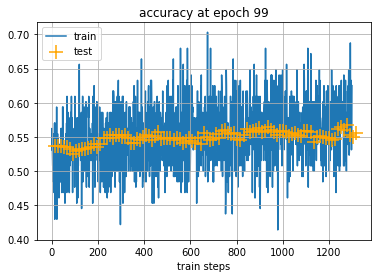

In [65]:
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
steps = len(train_ds) / 128

train(model, optimizer, steps)

In [49]:
X_train

,agent_1_feat_XGArealiz,agent_1_feat_MissedAv,agent_1_feat_XgaAv,agent_1_feat_xg_1,agent_1_feat_xga_1,agent_1_feat_result_2,agent_1_feat_scored_2.1,agent_1_feat_missed_3.1,agent_2_feat_Possession%,agent_2_feat_Pass%,...,agent_1_feat_total_scored_1.1,agent_1_feat_both_scored_3.1,agent_1_feat_both_scored_2.1,agent_2_feat_total_xg_1,agent_2_feat_total_xg_mean_3,agent_2_feat_total_xg_mean,agent_2_feattotal_scored_2,agent_2_feattotal_scored_mean_3,agent_2_featboth_scored_2,agent_2_featboth_scored_mean_3
365,1.254902,1.263158,1.006579,1.333240,0.535272,1.0,2.0,2.000000,42.7,69.4,...,3.0,1.000000,0.0,3.341190,2.870168,2.387172,5.0,3.000000,1.0,0.666667
298,1.118603,1.921053,1.717368,0.266048,2.200950,-1.0,1.0,1.000000,53.6,82.5,...,3.0,0.000000,1.0,3.067264,2.095194,2.409063,2.0,1.666667,0.0,0.000000
2266,1.075088,1.684211,1.566579,1.034020,0.833995,1.0,2.0,3.000000,62.6,89.3,...,3.0,1.000000,1.0,2.493900,3.888069,3.638300,1.0,3.000000,0.0,0.333333
1268,0.747699,1.026316,1.372632,1.542700,0.431402,1.0,1.0,1.000000,58.5,84.3,...,2.0,1.000000,0.0,2.833652,2.845870,3.096413,7.0,4.666667,1.0,1.000000
1961,0.868280,1.236842,1.424474,1.337350,1.287520,-1.0,0.0,1.000000,49.2,73.4,...,4.0,1.000000,0.0,3.477940,3.202682,3.056860,2.0,2.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0.834057,1.263158,1.514474,1.559620,2.406310,-1.0,1.0,2.000000,44.1,74.8,...,2.0,1.000000,1.0,2.462180,2.844368,3.040996,4.0,2.333333,1.0,0.333333
303,0.875939,1.289474,1.472105,1.904370,0.762371,1.0,2.0,1.000000,45.5,76.5,...,1.0,1.000000,1.0,2.082751,2.098180,1.990853,1.0,1.000000,0.0,0.333333
608,1.004566,1.447368,1.440789,1.589100,2.448640,-1.0,3.0,3.000000,52.0,80.9,...,2.0,1.000000,1.0,0.999513,2.280303,2.253573,0.0,2.000000,0.0,0.666667
1952,0.945946,0.921053,0.973684,2.344360,1.741300,0.0,2.0,0.684211,44.3,73.5,...,4.0,0.421053,1.0,3.838250,3.912507,3.053752,1.0,1.894737,0.0,0.473684


In [50]:
X_test = pd.read_csv('test.csv')
X_test = X_test[X_train.columns].fillna(0)
X_test

,agent_1_feat_XGArealiz,agent_1_feat_MissedAv,agent_1_feat_XgaAv,agent_1_feat_xg_1,agent_1_feat_xga_1,agent_1_feat_result_2,agent_1_feat_scored_2.1,agent_1_feat_missed_3.1,agent_2_feat_Possession%,agent_2_feat_Pass%,...,agent_1_feat_total_scored_1.1,agent_1_feat_both_scored_3.1,agent_1_feat_both_scored_2.1,agent_2_feat_total_xg_1,agent_2_feat_total_xg_mean_3,agent_2_feat_total_xg_mean,agent_2_feattotal_scored_2,agent_2_feattotal_scored_mean_3,agent_2_featboth_scored_2,agent_2_featboth_scored_mean_3
0,1.165049,0.947368,0.813158,0.615727,1.144900,0.0,1.0,0.0,49.7,83.2,...,4.0,0.0,1.0,4.406900,3.274733,2.425676,1.0,3.333333,0.0,0.666667
1,1.152593,1.210526,1.050263,1.144240,0.245193,-1.0,0.0,1.0,50.0,81.2,...,6.0,1.0,0.0,2.437679,2.825113,2.763566,2.0,2.000000,1.0,0.666667
2,0.956938,1.263158,1.320000,0.323445,0.852495,1.0,2.0,0.0,53.2,82.1,...,1.0,0.0,1.0,1.760627,1.741876,2.722591,2.0,2.333333,1.0,0.666667
3,1.049618,1.157895,1.103158,1.684010,0.753669,1.0,1.0,2.0,43.0,76.9,...,3.0,1.0,0.0,2.261983,2.081543,2.611194,1.0,1.666667,0.0,0.333333
4,0.856327,1.184211,1.382895,1.283850,0.978133,1.0,3.0,2.0,59.0,85.7,...,2.0,0.0,0.0,2.729660,2.331159,3.092417,0.0,2.666667,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1.292407,1.600000,1.238000,1.602300,0.813157,0.0,0.0,0.0,52.1,82.8,...,1.0,0.0,0.0,3.757075,3.122249,3.052177,4.0,4.000000,1.0,0.333333
566,0.769231,1.500000,1.950000,0.041797,1.619960,-1.0,1.0,0.0,47.4,76.6,...,3.0,0.0,1.0,1.313286,2.463521,2.903609,4.0,3.000000,1.0,0.333333
567,0.257069,0.200000,0.778000,1.191780,0.121506,1.0,2.0,0.0,49.3,81.3,...,2.0,0.0,0.0,2.531186,3.280421,2.519320,1.0,2.000000,0.0,0.333333
568,0.401606,0.200000,0.498000,2.147230,1.008800,1.0,5.0,0.0,46.3,79.7,...,5.0,0.0,1.0,2.627573,2.672845,2.504230,0.0,2.333333,0.0,0.666667


In [51]:
predictions = model(torch.from_numpy(X_test.to_numpy().copy()).to(torch.float32))
preds = (predictions.squeeze() > 0.5).to(torch.int32)

In [52]:
pd.Series(predictions.squeeze().detach().numpy()).describe()

count    570.000000
mean       0.539754
std        0.075198
min        0.334684
25%        0.499858
50%        0.530674
75%        0.572751
max        0.872531
dtype: float64

<AxesSubplot:>

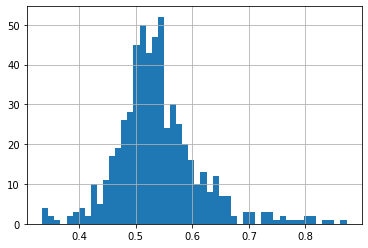

In [53]:
pd.Series(predictions.squeeze().detach().numpy()).hist(bins=50)

In [54]:
preds.sum()

tensor(427)

In [55]:
my_submission = pd.DataFrame({'id': X_test.index.to_numpy(), 'category': preds})
my_submission.to_csv('submission.csv', index=False)